# Credit Card Fraud Detection - K-Nearest Neighbor(KNN)

## Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')


In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,279191.0,93288.909044,46717.517069,0.000000,53586.000000,83243.000000,137540.000000,168698.000000
V1,279191.0,-0.001272,1.956449,-56.407510,-0.920245,0.019639,1.308995,2.454930
V2,279191.0,-0.006659,1.650325,-72.715728,-0.603004,0.062200,0.796786,22.057729
V3,279191.0,0.015942,1.513140,-48.325589,-0.867944,0.198216,1.039497,9.382558
V4,279191.0,0.002664,1.415707,-5.683171,-0.848314,-0.014778,0.750674,16.875344
V5,279191.0,-0.006015,1.379304,-113.743307,-0.697835,-0.061704,0.604329,34.801666
V6,279190.0,0.002661,1.330464,-26.160506,-0.765342,-0.270271,0.401990,73.301626
V7,279190.0,-0.002442,1.235443,-43.557242,-0.556175,0.036715,0.566054,120.589494
V8,279190.0,-0.000615,1.190557,-73.216718,-0.207526,0.023022,0.326848,20.007208
V9,279190.0,0.000206,1.100738,-13.434066,-0.645489,-0.052462,0.599446,15.594995


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279191 entries, 0 to 279190
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    279191 non-null  float64
 1   V1      279191 non-null  float64
 2   V2      279191 non-null  float64
 3   V3      279191 non-null  float64
 4   V4      279191 non-null  float64
 5   V5      279191 non-null  float64
 6   V6      279190 non-null  float64
 7   V7      279190 non-null  float64
 8   V8      279190 non-null  float64
 9   V9      279190 non-null  float64
 10  V10     279190 non-null  float64
 11  V11     279190 non-null  float64
 12  V12     279190 non-null  float64
 13  V13     279190 non-null  float64
 14  V14     279190 non-null  float64
 15  V15     279190 non-null  float64
 16  V16     279190 non-null  float64
 17  V17     279190 non-null  float64
 18  V18     279190 non-null  float64
 19  V19     279190 non-null  float64
 20  V20     279190 non-null  float64
 21  V21     27

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

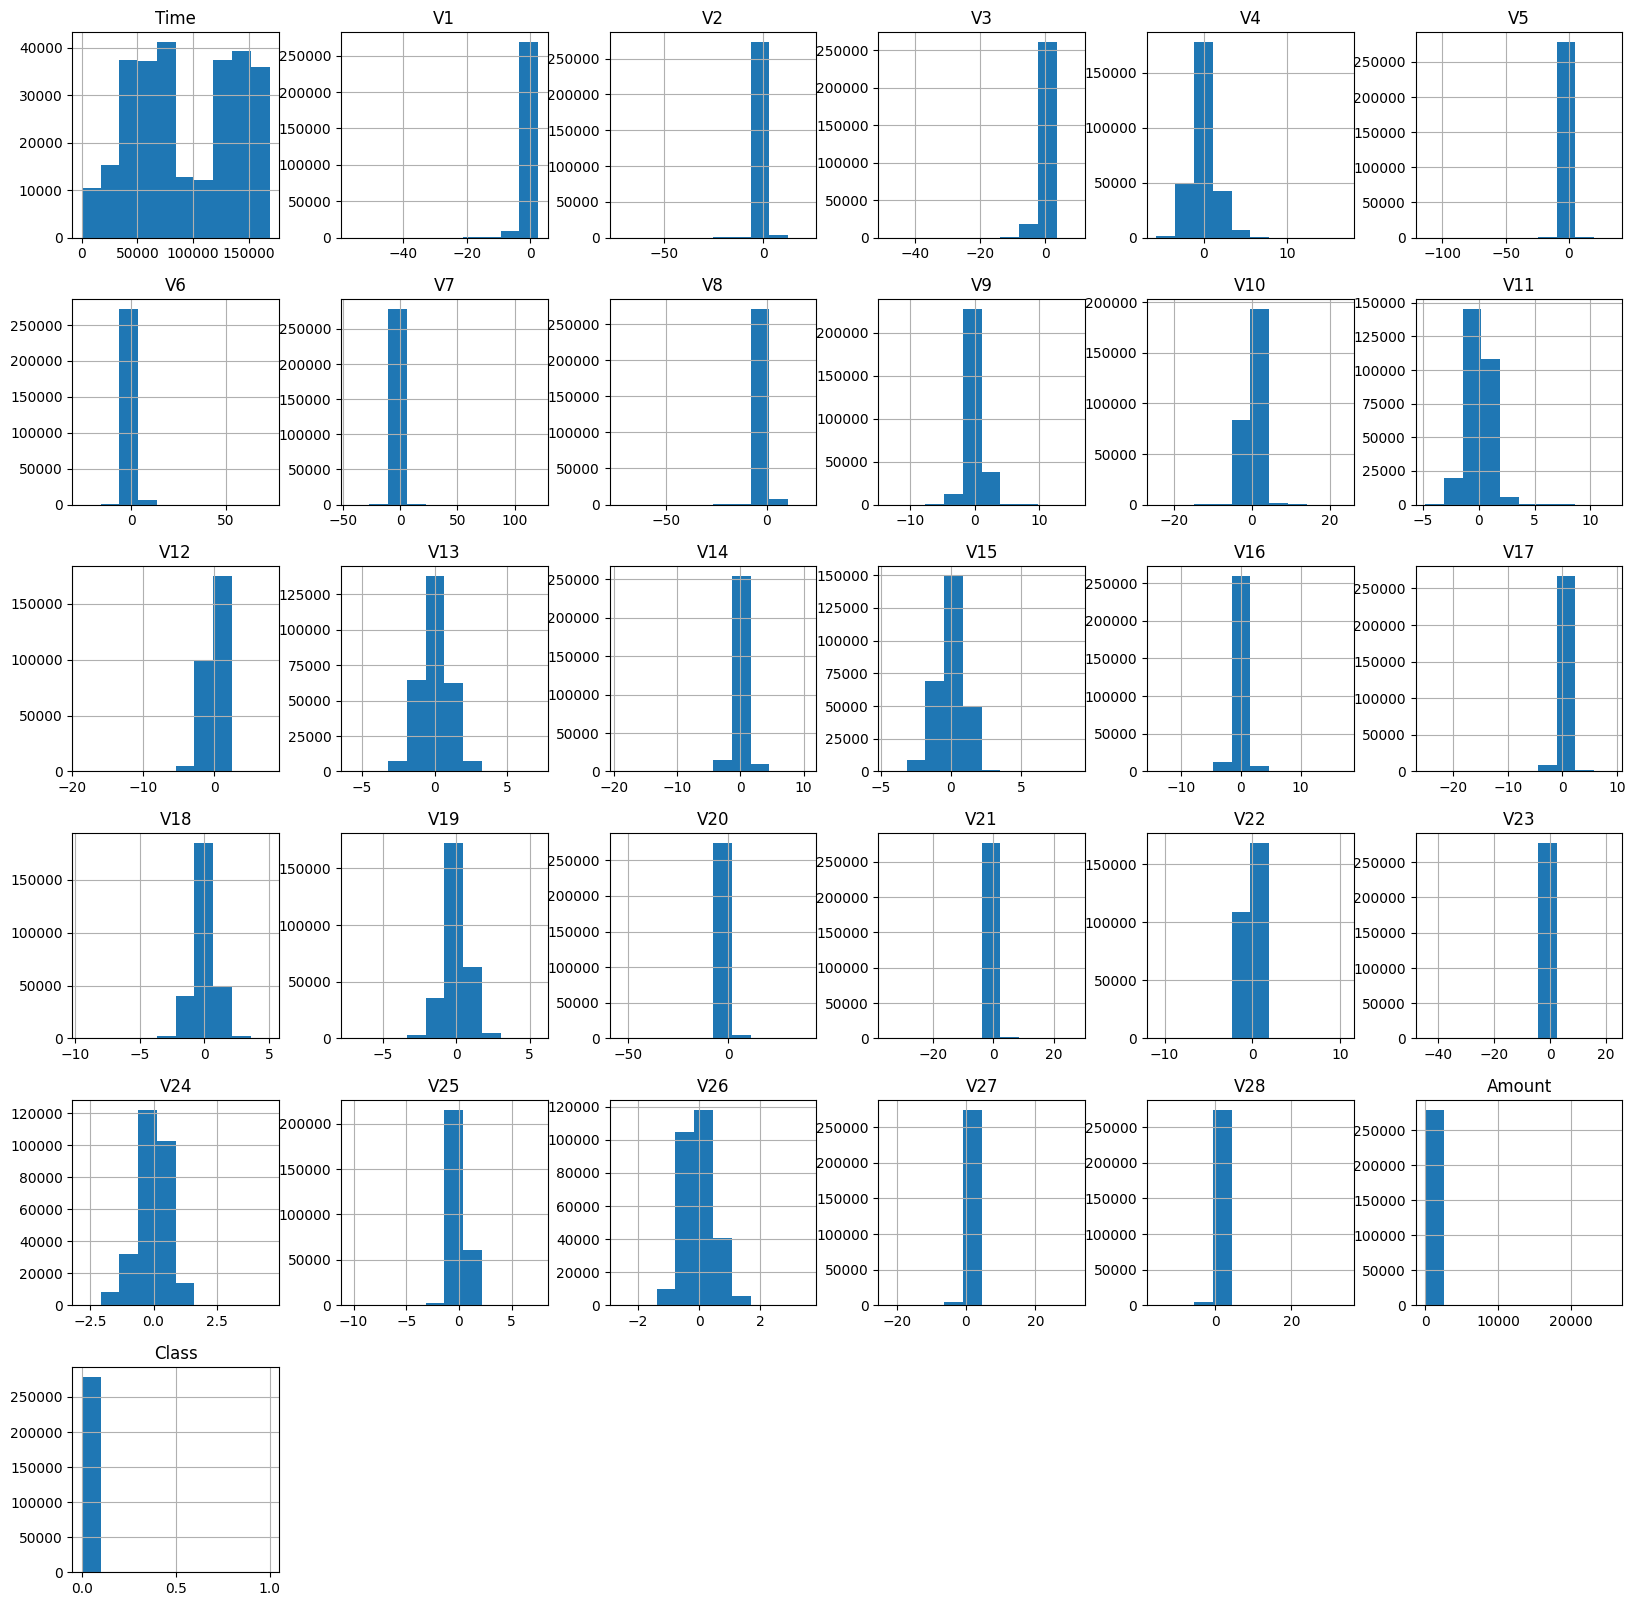

In [ ]:
#
credit_card_data.hist(figsize=(20,20))

In [ ]:
sns.pairplot(credit_card_data, hue='Class')

KeyboardInterrupt: 

## standardize the variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:

X = pd.DataFrame(scaler.fit_transform(credit_card_data.drop(["Class"],axis = 1)))
y = credit_card_data.Class

In [ ]:
X.head()

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Orginal K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred)
vis = ConfusionMatrixDisplay(confusion_matrix = conf_matrix,display_labels = [True,False])
vis.plot()
plt.grid(False)
plt.show()

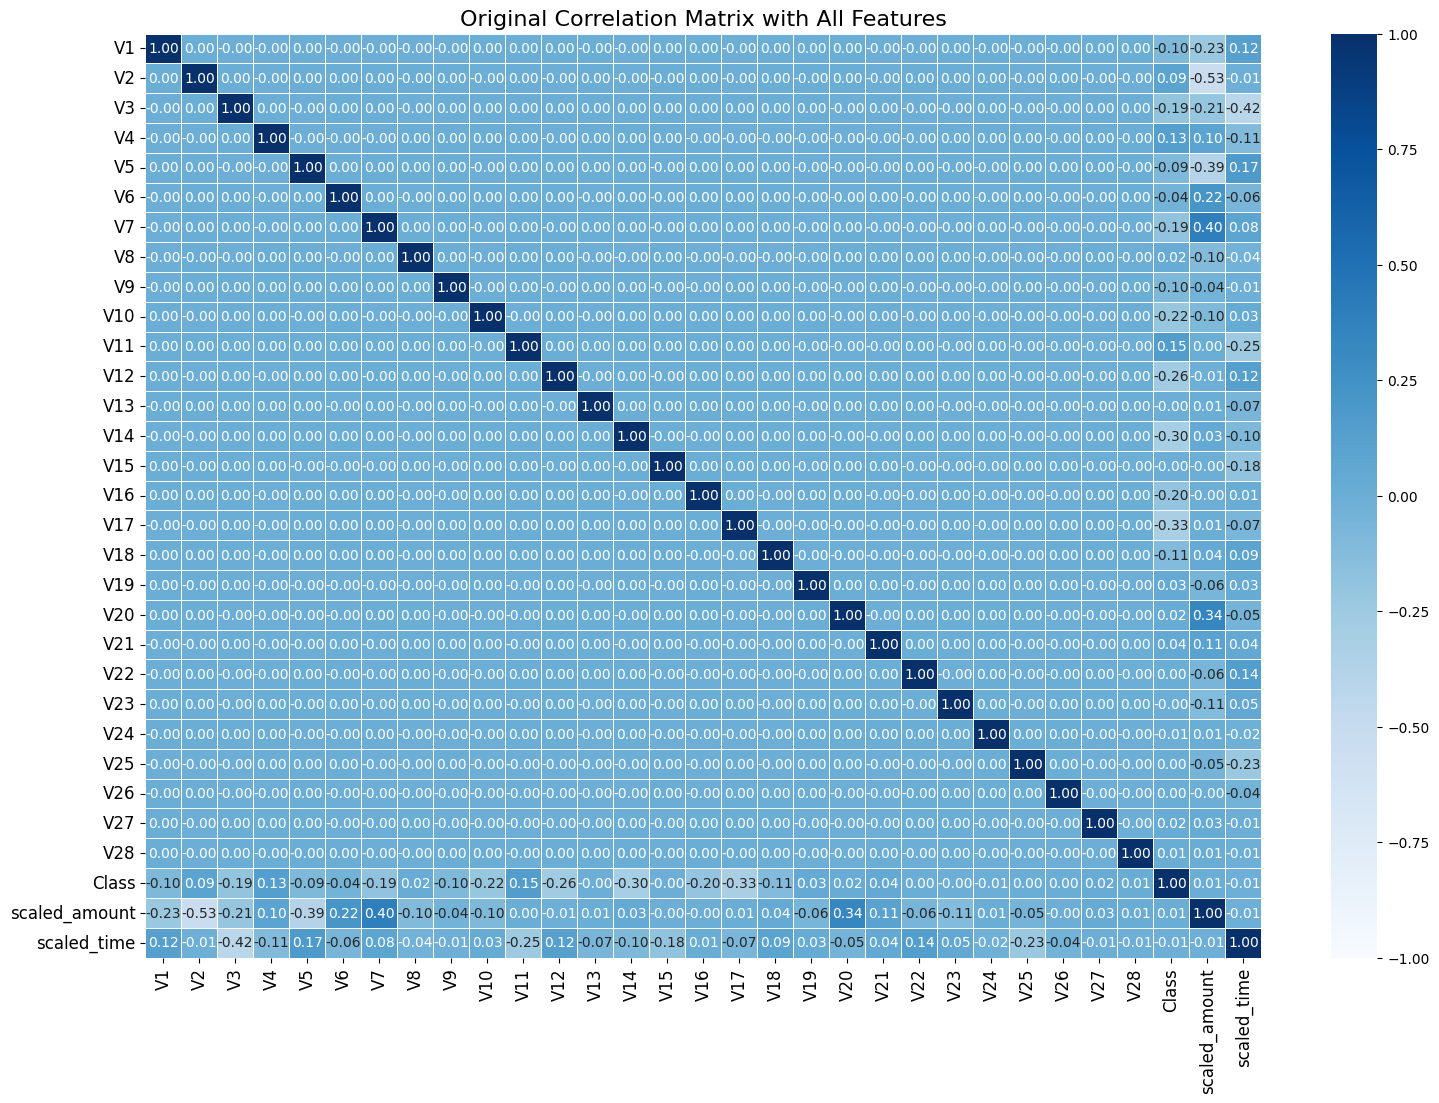

Significant Features (Correlation > 0.1):
 ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

Removed Insignificant Features (Correlation <= 0.1):
 ['V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']
Confusion Matrix:
 [[56564   186]
 [    0 56976]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Non-Fraudulent Transaction Prediction:
Prediction: Not Fraudulent

Fraudulent Transaction Prediction:
Prediction: Not Fraudulent


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Feature scaling: Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns after scaling
df = df.drop(['Amount', 'Time'], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the original correlation matrix with all features
plt.figure(figsize=(18, 12))  # Increased the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})  # Adjusted font size
plt.title('Original Correlation Matrix with All Features', fontsize=16)  # Title font size increased
plt.xticks(fontsize=12)  # Adjust x-axis label font size
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.show()


# Define a threshold for selecting significant variables
significant_corr_threshold = 0.1
correlation_with_target = correlation_matrix['Class'].drop('Class')

# Identify significant features based on the threshold
significant_features = correlation_with_target[abs(correlation_with_target) > significant_corr_threshold].index.tolist()
insignificant_features = correlation_with_target[abs(correlation_with_target) <= significant_corr_threshold].index.tolist()

print("Significant Features (Correlation > 0.1):\n", significant_features)
print("\nRemoved Insignificant Features (Correlation <= 0.1):\n", insignificant_features)

# Keep only significant features
df_significant = df[significant_features + ['Class']]

# Define X (features) and y (target)
X = df_significant.drop('Class', axis=1)
y = df_significant['Class']

# Handle the imbalanced dataset using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prepare new transaction data with only the significant features
new_data_non_fraudulent = pd.DataFrame({
    'V1': [-1.359807],  'V3': [2.536346], 'V4': [1.378155], 'V7': [0.239599], 'V10': [0.090794],
    'V11': [-0.5516],  'V12': [0.415798],  'V14': [0.069083],  'V16': [0.237609],  'V17': [-0.377869],
    'V18': [0.505056]
})

new_data_fraudulent = pd.DataFrame({
    'V1': [1.76321],  'V3': [1.8953], 'V4': [2.564], 'V7': [-1.8954], 'V10': [0.58294],
    'V11': [-1.87654],  'V12': [1.543],  'V14': [-0.56423],  'V16': [0.76435],  'V17': [-1.564],
    'V18': [0.6573]
})

# Predict whether the new transactions are fraudulent using the KNN model
print("\nNon-Fraudulent Transaction Prediction:")
prediction_non_fraudulent = knn_model.predict(new_data_non_fraudulent)
print("Prediction:", "Fraudulent" if prediction_non_fraudulent[0] == 1 else "Not Fraudulent")

print("\nFraudulent Transaction Prediction:")
prediction_fraudulent = knn_model.predict(new_data_fraudulent)
print("Prediction:", "Fraudulent" if prediction_fraudulent[0] == 1 else "Not Fraudulent")


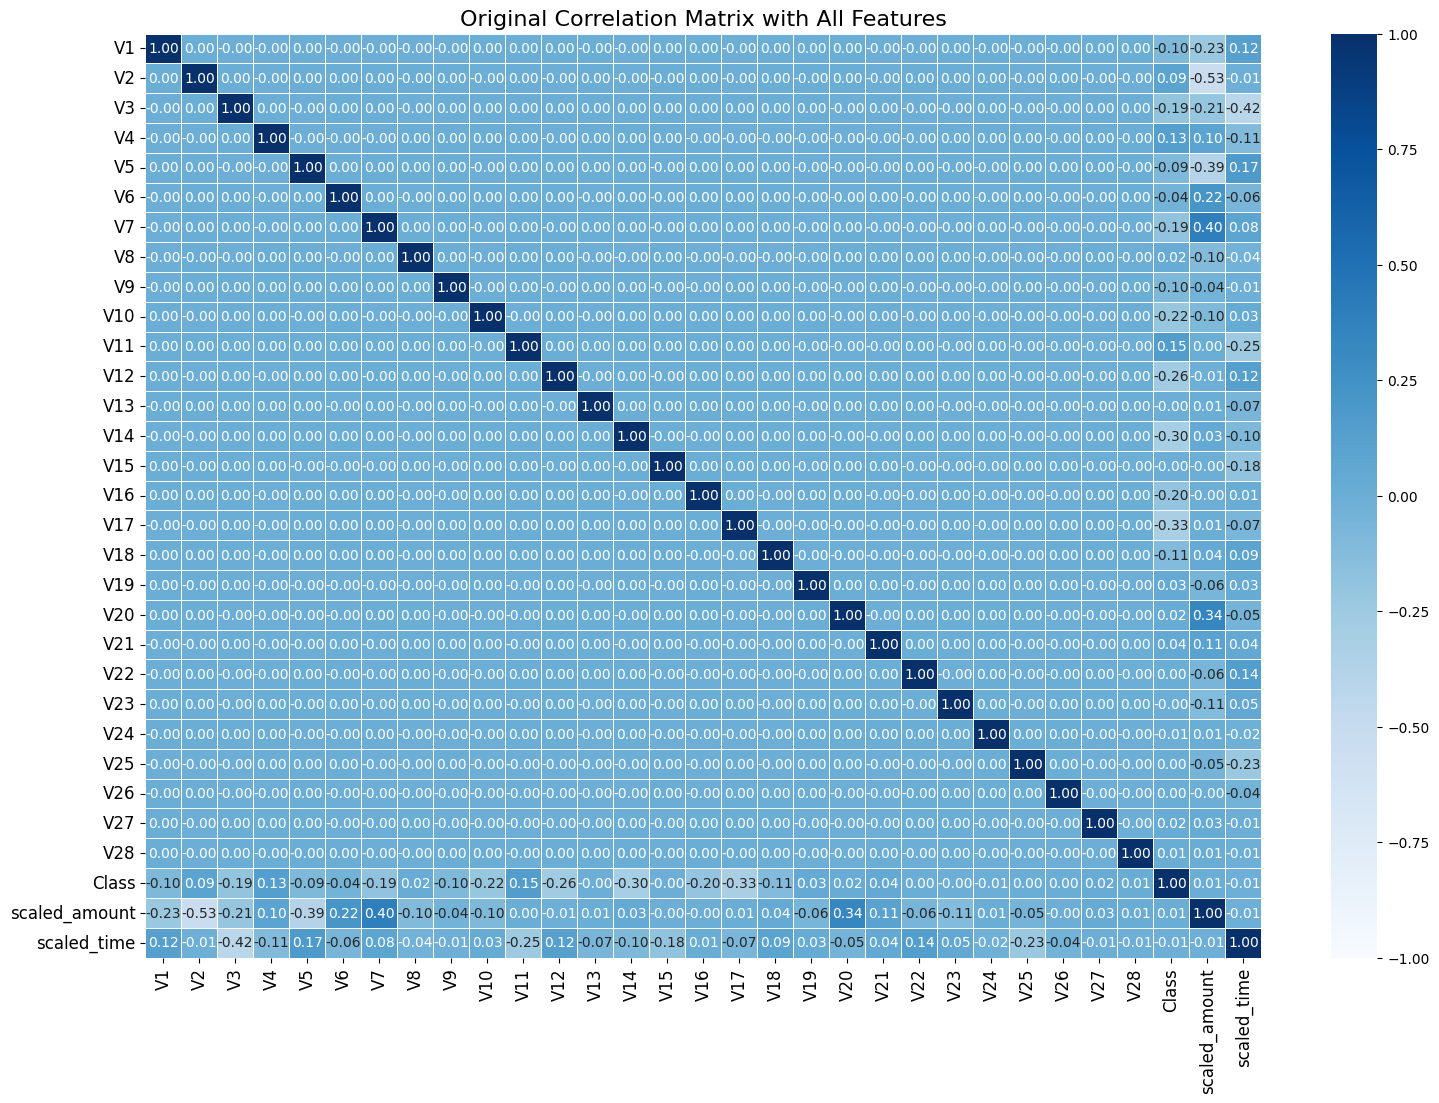

Significant Features (Correlation > 0.1):
 ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

Removed Insignificant Features (Correlation <= 0.1):
 ['V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time']
Confusion Matrix:
 [[56564   186]
 [    0 56976]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Non-Fraudulent Transaction Prediction using relevant features:
Prediction: Not Fraudulent
Prediction Time (Relevant Features): 0.0086 seconds

Fraudulent Transaction Prediction using relevant features:
Prediction: Not Fraudulent
Prediction Time (Relevant Features): 0.0069 secon

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Feature scaling: Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns after scaling
df = df.drop(['Amount', 'Time'], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the original correlation matrix with all features
plt.figure(figsize=(18, 12))  # Increased the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})  # Adjusted font size
plt.title('Original Correlation Matrix with All Features', fontsize=16)  # Title font size increased
plt.xticks(fontsize=12)  # Adjust x-axis label font size
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.show()

# Define a threshold for selecting significant variables
significant_corr_threshold = 0.1
correlation_with_target = correlation_matrix['Class'].drop('Class')

# Identify significant features based on the threshold
significant_features = correlation_with_target[abs(correlation_with_target) > significant_corr_threshold].index.tolist()
insignificant_features = correlation_with_target[abs(correlation_with_target) <= significant_corr_threshold].index.tolist()

print("Significant Features (Correlation > 0.1):\n", significant_features)
print("\nRemoved Insignificant Features (Correlation <= 0.1):\n", insignificant_features)

# Keep only significant features
df_significant = df[significant_features + ['Class']]

# Define X (features) and y (target)
X = df_significant.drop('Class', axis=1)
y = df_significant['Class']

# Handle the imbalanced dataset using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prepare new transaction data with only the significant features for both non-fraudulent and fraudulent cases
new_data_non_fraudulent = pd.DataFrame({
    'V1': [-1.359807],  'V3': [2.536346], 'V4': [1.378155], 'V7': [0.239599], 'V10': [0.090794],
    'V11': [-0.5516],  'V12': [0.415798],  'V14': [0.069083],  'V16': [0.237609],  'V17': [-0.377869],
    'V18': [0.505056]
})

new_data_fraudulent = pd.DataFrame({
    'V1': [1.76321],  'V3': [1.8953], 'V4': [2.564], 'V7': [-1.8954], 'V10': [0.58294],
    'V11': [-1.87654],  'V12': [1.543],  'V14': [-0.56423],  'V16': [0.76435],  'V17': [-1.564],
    'V18': [0.6573]
})

# Measure prediction time for non-fraudulent transaction with relevant features
print("\nNon-Fraudulent Transaction Prediction using relevant features:")
start_non_fraudulent_time_relevant = time.time()
prediction_non_fraudulent = knn_model.predict(new_data_non_fraudulent)
end_non_fraudulent_time_relevant = time.time()

print("Prediction:", "Fraudulent" if prediction_non_fraudulent[0] == 1 else "Not Fraudulent")
print(f"Prediction Time (Relevant Features): {end_non_fraudulent_time_relevant - start_non_fraudulent_time_relevant:.4f} seconds")

# Measure prediction time for fraudulent transaction with relevant features
print("\nFraudulent Transaction Prediction using relevant features:")
start_fraudulent_time_relevant = time.time()
prediction_fraudulent = knn_model.predict(new_data_fraudulent)
end_fraudulent_time_relevant = time.time()

print("Prediction:", "Fraudulent" if prediction_fraudulent[0] == 1 else "Not Fraudulent")
print(f"Prediction Time (Relevant Features): {end_fraudulent_time_relevant - start_fraudulent_time_relevant:.4f} seconds")

# Prepare new transaction data with all features (dummy irrelevant features added) for both non-fraudulent and fraudulent cases
new_data_non_fraudulent_all = pd.DataFrame({
    'V1': [-1.359807], 'V2': [1.2], 'V3': [2.536346], 'V4': [1.378155], 'V5': [-0.3], 'V6': [0.4],
    'V7': [0.239599], 'V8': [0.1], 'V9': [0.36], 'V10': [0.090794], 'V11': [-0.5516], 'V12': [0.415798],
    'V13': [0.2], 'V14': [0.069083], 'V15': [0.12], 'V16': [0.237609], 'V17': [-0.377869], 'V18': [0.505056],
    'V19': [0.1], 'V20': [0.09], 'V21': [-0.1], 'V22': [-0.15], 'V23': [0.33], 'V24': [0.26], 'V25': [0.27],
    'V26': [0.4], 'V27': [0.25], 'V28': [0.11]
})

new_data_fraudulent_all = pd.DataFrame({
    'V1': [1.76321], 'V2': [-1.43], 'V3': [1.8953], 'V4': [2.564], 'V5': [3.29], 'V6': [-1.95],
    'V7': [-1.8954], 'V8': [1.60], 'V9': [-2.87], 'V10': [0.58294], 'V11': [-1.87654], 'V12': [1.543],
    'V13': [-2.56], 'V14': [-0.56423], 'V15': [1.89], 'V16': [0.76435], 'V17': [-1.564], 'V18': [0.6573],
    'V19': [2.55], 'V20': [-2.90], 'V21': [-1.75], 'V22': [1.32], 'V23': [-0.50], 'V24': [-2.10],
    'V25': [2.14], 'V26': [-1.30], 'V27': [-2.15], 'V28': [1.10]
})

# Measure prediction time for non-fraudulent transaction with all features
print("\nNon-Fraudulent Transaction Prediction using all features:")
start_non_fraudulent_time_all = time.time()
new_data_non_fraudulent_all_relevant = new_data_non_fraudulent_all[significant_features]
prediction_non_fraudulent_all = knn_model.predict(new_data_non_fraudulent_all_relevant)
end_non_fraudulent_time_all = time.time()

print("Prediction:", "Fraudulent" if prediction_non_fraudulent_all[0] == 1 else "Not Fraudulent")
print(f"Prediction Time (All Features): {end_non_fraudulent_time_all - start_non_fraudulent_time_all:.4f} seconds")

# Measure prediction time for fraudulent transaction with all features
print("\nFraudulent Transaction Prediction using all features:")
start_fraudulent_time_all = time.time()

# Extract relevant features from the all-features dataset for fraudulent transaction
new_data_fraudulent_all_relevant = new_data_fraudulent_all[significant_features]

# Predict using relevant features from the full dataset
prediction_fraudulent_all = knn_model.predict(new_data_fraudulent_all_relevant)

end_fraudulent_time_all = time.time()

# Print prediction and time taken
print("Prediction:", "Fraudulent" if prediction_fraudulent_all[0] == 1 else "Not Fraudulent")
print(f"Prediction Time (All Features): {end_fraudulent_time_all - start_fraudulent_time_all:.4f} seconds")

